# Анализ сервиса аренды самокатов

В рамках данного проекта необходимо провести исследование компании по аренде самокатов GoFast, которая предлагает использование своего сервиса бесплатно или с платной подпиской.

`Условия без подписки`

- абонентская плата отсутствует
- стоимость одной минуты поездки — 8 рублей
- стоимость старта (начала поездки) — 50 рублей

`С подпиской Ultra`

- абонентская плата — 199 рублей в месяц
- стоимость одной минуты поездки — 6 рублей
- стоимость старта — бесплатно

**Цель**

Провести анализ компании и проверить гипотезы, которые помогут в принятии решений для увеличения ключевых бизнес показателей.

**План работы:**

1. Изучить датафрейм
2. Предобработать данные
3. Провести анализ данных
4. Проверить гипотезы
5. Написать общий вывод

Входные данные - *3 датафрейма с информацией о пользователях, их поездках и подписках.*

In [ ]:
# импортируем необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [ ]:
# считываем и сохраняем данные

try:
    users = pd.read_csv('/datasets/users_go.csv')
except:
    print('users error')

try:
    rides = pd.read_csv('/datasets/rides_go.csv')
except:
    print('rides error')

try:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    print('subscriptions error')

display(users.head())
display(rides.head())
display(subscriptions.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [ ]:
# выводим общую ифнормацию по каждому датафрейму

users.info()
print()
print()
rides.info()
print()
print()
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #  

**Вывод**

- Данных о пользователях представлено на 1.5 тысячи строк, поездок - 18 тысяч и 2 типа подписки
- Пропусков в данных нет
- У столбца с датой в датафрейме поездок неправильный тип данных

#### Шаг 2. Предобработка данных

In [ ]:
# приводим столбец к правильному типу

rides['date'] = pd.to_datetime(rides['date'])

In [ ]:
# добавляем вспомогательный столбец

rides['month'] = rides['date'].dt.month

In [ ]:
#

min_date = rides['date'].min()
max_date = rides['date'].max()

print(f'Данные представлены в период с {min_date} по {max_date}')

Данные представлены в период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


In [ ]:
# считаем пропуски

print(users.isna().sum())
print()
print(rides.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


In [ ]:
# считаем дубликаты

print(users.duplicated().sum())
print()
print(rides.duplicated().sum())

31

0


In [ ]:
# просмотриваем дубликаты

users[users['user_id'].duplicated() == True]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [ ]:
# удаляем дубликаты и проверяем их заново

users = users.drop_duplicates()
users.duplicated().sum()

0

In [ ]:
# выводим уникальные значения для проверки аномалий

users['age'].unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

In [ ]:
# проверяем распределение значений

print(rides['distance'].describe())
print()
print(rides['duration'].describe())

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


**Вывод**

- Столбец с датой преобразовали правильный тип
- Создали столбец с месяцем поездки
- Пропуски в данных отсутствуют
- Удалили строки с повторяющимися id пользователей
- Проверили уникальные значения возраста и разброс данных в дистанции и времени использования самокатом

#### Шаг 3. Исследовательский анализ данных

,city,count,%_of_amount
0,Пятигорск,219,0.14
1,Екатеринбург,204,0.13
2,Ростов-на-Дону,198,0.13
3,Краснодар,193,0.13
4,Сочи,189,0.12
5,Омск,183,0.12
6,Тюмень,180,0.12
7,Москва,168,0.11


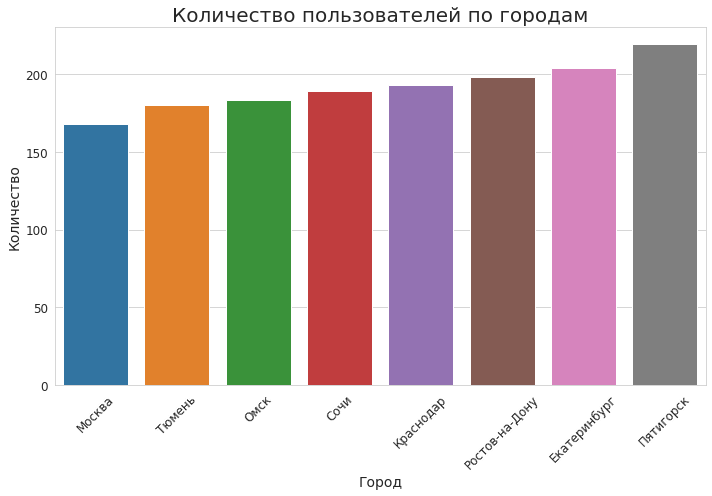

In [ ]:
# группируем города по количеству пользователей

count_city = users.pivot_table(index='city', values='age', aggfunc='count')\
                  .sort_values(by='age', ascending=False)
count_city.reset_index(inplace=True)
count_city.columns = ['city', 'count']
count_city['%_of_amount'] = round(count_city['count'] / count_city['count'].sum(), 2)
display(count_city)

# строим график

sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))

sns.barplot(data=count_city,
            x='city',
            y='count',
            order=count_city.sort_values('count').city)

plt.title('Количество пользователей по городам', size=20)
plt.xlabel('Город', size=14)
plt.ylabel('Количество', size=14)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.tight_layout()

plt.show()

**Вывод**

Наибольшее количество пользоваетелей сервиса из Пятигорска, меньше всего в Москве. В Пятигорске на 3% больше пользователей, чем в Москве.

,subscription_type,count,%_of_amount
0,free,835,0.54
1,ultra,699,0.46


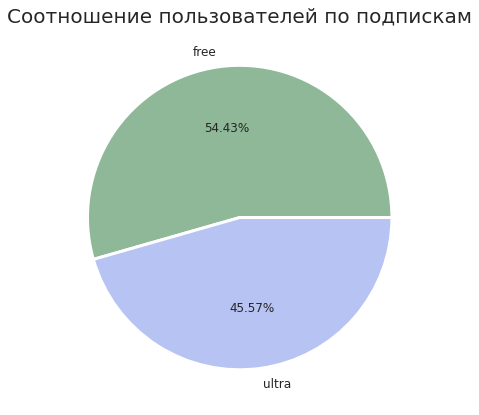

In [ ]:
# считаем количество пользователей по типу подписки

count_subscribe = users.pivot_table(index='subscription_type', values='age', aggfunc='count')\
                       .sort_values(by='age', ascending=False)
count_subscribe.reset_index(inplace=True)
count_subscribe.columns = ['subscription_type', 'count']
count_subscribe['%_of_amount'] = round(count_subscribe['count'] / count_subscribe['count'].sum(), 2)
display(count_subscribe)

values = count_subscribe['count']
labels = ['free', 'ultra']

plt.figure(figsize=(10, 7))

plt.pie(values,
        labels=labels,
        textprops={'size' : 12},
        wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'},
        autopct='%.2f%%',
        colors=['#8EB897', '#B7C3F3'])

plt.title('Соотношение пользователей по подпискам', size=20)

plt.show()

**Вывод**

Число пользователей по типу подписки отличается не сильно, без подписки на 136 больше, чем с подпиской. Это может быть связано с непостоянностью использования шеринга самокатов.

,age,count
0,25,145
1,24,132
2,26,131
3,23,129
4,27,119
5,22,119
6,28,112
7,21,93
8,20,71
9,30,68


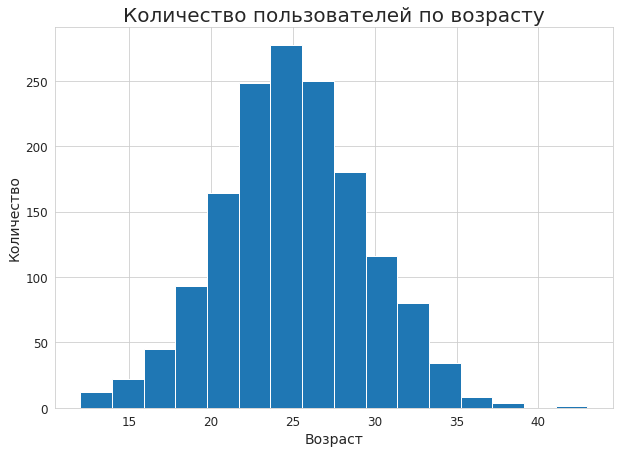

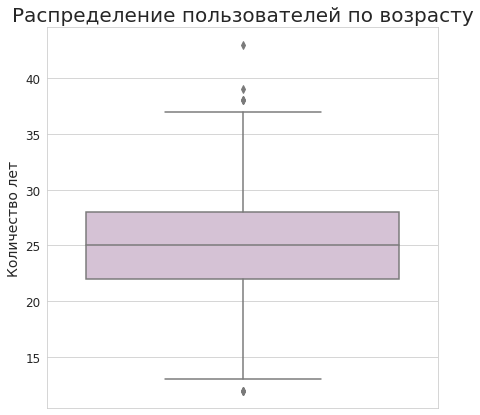

In [ ]:
# проверяем количество пользователей каждого возраста

count_age = users.pivot_table(index='age', values='city', aggfunc='count')\
                 .sort_values(by='city', ascending=False)
count_age.reset_index(inplace=True)
count_age.columns = ['age', 'count']
display(count_age)

plt.figure(figsize=(10, 7))

users['age'].plot(kind='hist',
                  bins=16)

plt.title('Количество пользователей по возрасту', size=20)
plt.xlabel('Возраст', size=14)
plt.ylabel('Количество', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()


sns.set_style('whitegrid')
plt.figure(figsize=(7, 7))

sns.boxplot(data=users,
            y='age',
            color='thistle')

plt.title('Распределение пользователей по возрасту', size=20)
plt.ylabel('Количество лет', size=14)
plt.yticks(size=12)

plt.show()

**Вывод**

Возраст клиентов распределён нормально, медианные возраст - 25 лет. Самый наименьший возраст - 12 лет, наибольший - 43 года. Распределение возраста нормальное.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


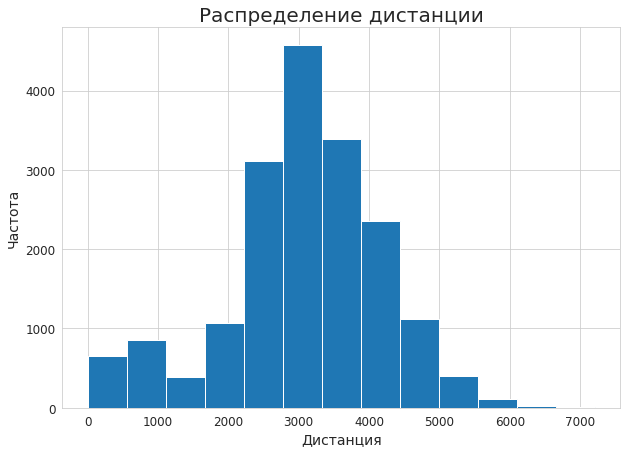

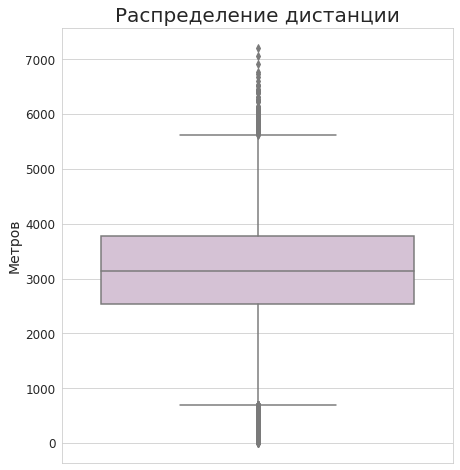

In [ ]:
# проверяем распределение дистанции поездок

print(rides['distance'].describe())

plt.figure(figsize=(10, 7))

rides['distance'].plot(kind='hist',
                       bins=13)

plt.title('Распределение дистанции', size=20)
plt.xlabel('Дистанция', size=14)
plt.ylabel('Частота', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(7, 8))

sns.boxplot(data=rides,
            y='distance',
            color='thistle')

plt.title('Распределение дистанции', size=20)
plt.ylabel('Метров', size=14)
plt.yticks(size=12)

plt.show()

**Вывод**

В среднем клиенты проезжают на самокатах 3,1 км с дисперсией 600 метров. Присутствуют и выбросы, среди которых есть дистанция 85 см, причин этому может быть много: тестовый заезд, резкая смена погоды, разрядился самокат и др. Распределение дистанции близко к нормальному.

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


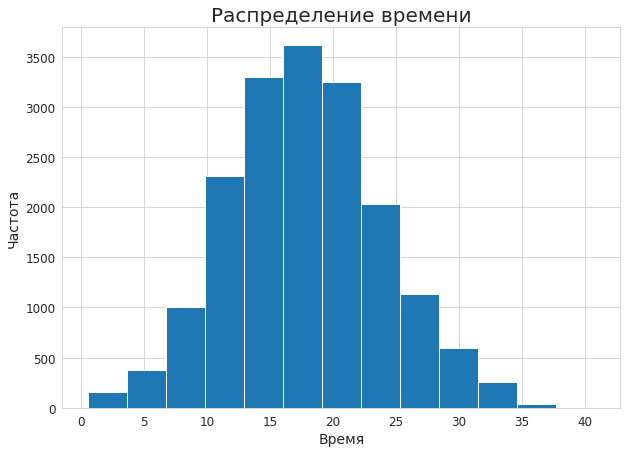

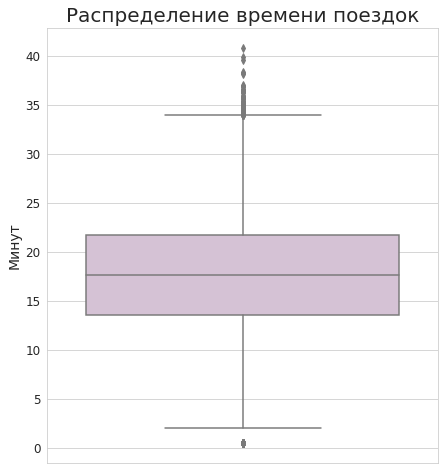

In [ ]:
# проверяем распределение времени поездок

print(rides['duration'].describe())

plt.figure(figsize=(10, 7))

rides['duration'].plot(kind='hist',
                       bins=13)

plt.title('Распределение времени', size=20)
plt.xlabel('Время', size=14)
plt.ylabel('Частота', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(7, 8))

sns.boxplot(data=rides,
            y='duration',
            color='thistle')

plt.title('Распределение времени поездок', size=20)
plt.ylabel('Минут', size=14)
plt.yticks(size=12)

plt.show()

**Вывод**

Среднее время заезда - 17 минут. Есть выбросы (например, 30 секунд), у которых скорее всего те же причины, что и у аномально маленьких дистанций. Распределение времени поездок нормальное.

**Вывод**

- Больше всего пользователей из Пятигорска
- Клиентов без подписки больше
- Средний возраст клиентов - 25 лет. Межквартильный размах - 5 лет.
- Средняя дистанция за поездку - 3,1 км. Межквартильный размах примерно 1200 метров.
- Средняя время поездки - 17 минут. Межквартильный размах составляет примерно 8 минут.

In [ ]:
# check
users[['age']].describe().round(1)

,age
count,1534.0
mean,24.9
std,4.6
min,12.0
25%,22.0
50%,25.0
75%,28.0
max,43.0


#### Шаг 4. Объединение данных

In [ ]:
# объединяем все датасеты

data = users.merge(rides)
data = data.merge(subscriptions)
data['duration'] = np.ceil(data['duration'])
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
print(data.count())
print()
print(data.isna().sum())

user_id              18068
name                 18068
age                  18068
city                 18068
subscription_type    18068
distance             18068
duration             18068
date                 18068
month                18068
minute_price         18068
start_ride_price     18068
subscription_fee     18068
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


In [ ]:
# выделяем из общего датасета 2 с разными типами подписок

user_free = data.query('subscription_type == "free"')
user_ultra = data.query('subscription_type == "ultra"')

display(user_free.head())
print()
display(user_ultra.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
print(user_free.count())
print()
print(user_ultra.count())
print()
print(len(user_free) + len(user_ultra) == len(data))

user_id              11568
name                 11568
age                  11568
city                 11568
subscription_type    11568
distance             11568
duration             11568
date                 11568
month                11568
minute_price         11568
start_ride_price     11568
subscription_fee     11568
dtype: int64

user_id              6500
name                 6500
age                  6500
city                 6500
subscription_type    6500
distance             6500
duration             6500
date                 6500
month                6500
minute_price         6500
start_ride_price     6500
subscription_fee     6500
dtype: int64

True


count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


,month,distance_free,distance_ultra
0,1,3097.14,3077.32
1,2,3024.26,3100.77
2,3,2994.99,3128.24
3,4,3005.60,3111.74
4,5,3111.05,3125.53
5,6,3075.58,3117.32
6,7,3061.25,3151.00
7,8,2990.11,3120.93
8,9,3049.33,3081.55
9,10,2977.35,3138.26


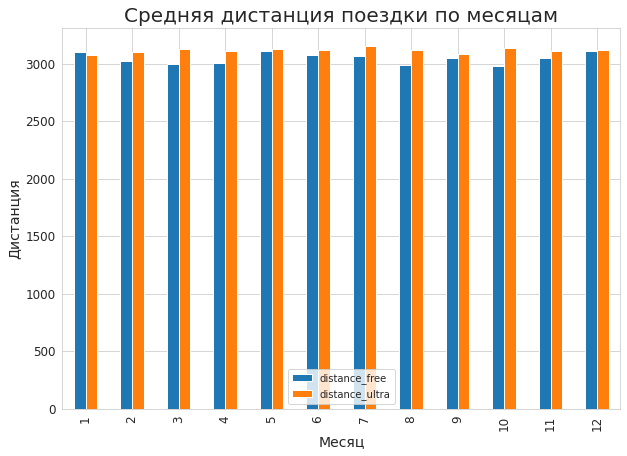

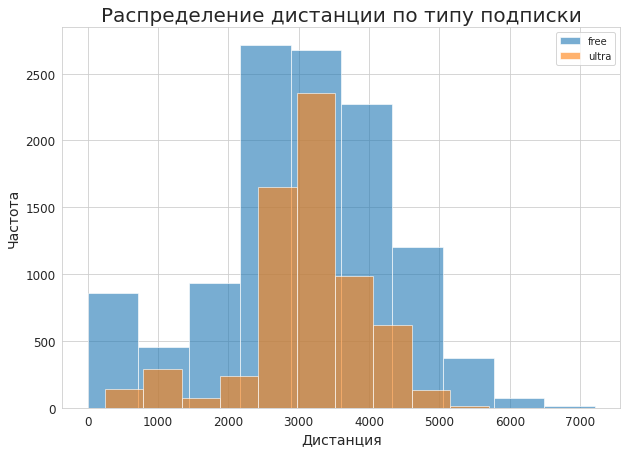

In [ ]:
print(user_free['distance'].describe())
print()
print(user_ultra['distance'].describe())

# считаем среднюю дистанцию пользователей с подпиской и без по месяцам

month_distance_free = user_free.pivot_table(index='month', values='distance', aggfunc='mean')\
                          .sort_values(by='month')
month_distance_free.reset_index(inplace=True)
month_distance_free.columns = ['month', 'distance_free']
month_distance_free.distance_free = month_distance_free.distance_free.round(2)

month_distance_ultra = user_ultra.pivot_table(index='month', values='distance', aggfunc='mean')\
                          .sort_values(by='month')
month_distance_ultra.reset_index(inplace=True)
month_distance_ultra.columns = ['month', 'distance_ultra']
month_distance_ultra.distance_ultra = month_distance_ultra.distance_ultra.round(2)

month_distance = month_distance_free.merge(month_distance_ultra, on='month')
display(month_distance)


month_distance.plot(kind='bar',
                    x='month',
                    figsize=(10, 7),
                    grid=True,
                    legend=True)

plt.title('Средняя дистанция поездки по месяцам', size=20)
plt.xlabel('Месяц', size=14)
plt.ylabel('Дистанция', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

plt.figure(figsize=(10, 7))

plt.hist(user_free['distance'], alpha=0.6, label='free')
plt.hist(user_ultra['distance'], alpha=0.6, label='ultra')

plt.title('Распределение дистанции по типу подписки', size=20)
plt.xlabel('Дистанция', size=14)
plt.ylabel('Частота', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc='upper right')

plt.show()

**Вывод**

Средняя дистанция пользователей с подпиской почти в каждом месяце превышает дистанцию пользователей без подписки. У обеих групп пользователей примерно одинаковое среднее расстояние, но межквартильный размах больше у "бесплатных".

count    11568.000000
mean        17.890992
std          6.330250
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64


,month,duration_free,duration_ultra
0,1,17.96,18.98
1,2,17.63,19.28
2,3,17.56,18.96
3,4,18.04,19.02
4,5,18.16,19.16
5,6,18.06,19.07
6,7,17.97,19.12
7,8,17.67,19.17
8,9,17.91,18.99
9,10,17.72,18.87


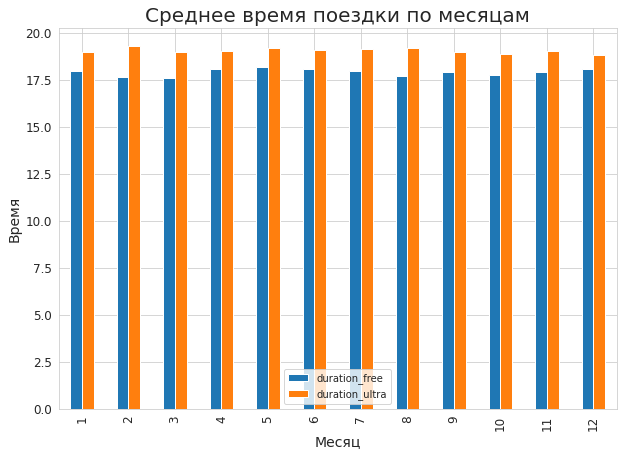

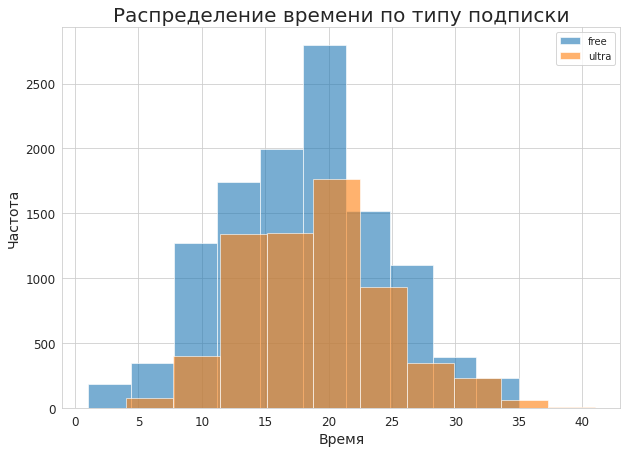

In [ ]:
print(user_free['duration'].describe())
print()
print(user_ultra['duration'].describe())

# считаем среднее время поездок пользователей с подпиской и без по месяцам

month_duration_free = user_free.pivot_table(index='month', values='duration', aggfunc='mean')\
                          .sort_values(by='month')
month_duration_free.reset_index(inplace=True)
month_duration_free.columns = ['month', 'duration_free']
month_duration_free.duration_free = month_duration_free.duration_free.round(2)

month_duration_ultra = user_ultra.pivot_table(index='month', values='duration', aggfunc='mean')\
                          .sort_values(by='month')
month_duration_ultra.reset_index(inplace=True)
month_duration_ultra.columns = ['month', 'duration_ultra']
month_duration_ultra.duration_ultra = month_duration_ultra.duration_ultra.round(2)

month_duration = month_duration_free.merge(month_duration_ultra, on='month')
display(month_duration)


month_duration.plot(kind='bar',
                    x='month',
                    figsize=(10, 7),
                    grid=True,
                    legend=True)

plt.title('Среднее время поездки по месяцам', size=20)
plt.xlabel('Месяц', size=14)
plt.ylabel('Время', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc='lower center')

plt.show()

plt.figure(figsize=(10, 7))

plt.hist(user_free['duration'], alpha=0.6, label='free')
plt.hist(user_ultra['duration'], alpha=0.6, label='ultra')

plt.title('Распределение времени по типу подписки', size=20)
plt.xlabel('Время', size=14)
plt.ylabel('Частота', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.legend(loc='upper right')

plt.show()

**Вывод**

Средняя время поездок пользователей с подпиской почти каждый месяц на 1 минуту больше, чем пользователей без неё. Межквартильный размах у клиентов с подпиской немного меньше.

**Вывод**

- Объединили все датафреймы в один
- Разделили данные на 2 таблицы по типу подписки
- Средняя дистанции и время поездок у пользователей с подпиской выше

#### Шаг 5. Подсчёт выручки

In [ ]:
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


In [ ]:
# для каждого уникального пользователя выводим по каждому месяцу суммарную дистанцию, время, количество поездок и тип подписки

param_per_user = data.pivot_table(index=['month', 'user_id'],
                                  values=['distance',
                                          'duration',
                                          'name',
                                          'subscription_type',
                                          'minute_price',
                                          'start_ride_price',
                                          'subscription_fee'],
                                  aggfunc={'distance': 'sum',
                                           'duration': 'sum',
                                           'name': 'count',
                                           'subscription_type': min,
                                           'minute_price': min,
                                           'start_ride_price': min,
                                           'subscription_fee': min})

param_per_user = param_per_user.rename(columns={
    'name': 'count_rides'
})
param_per_user.distance = param_per_user.distance.round(2)
param_per_user.duration = param_per_user.duration.round(2)
param_per_user.head()

distance  duration  minute_price  count_rides  \
month user_id                                                  
1     1         7027.51      42.0             6            2   
      3         3061.78      13.0             6            1   
      5         3914.65      13.0             6            1   
      7         6478.08      28.0             6            2   
      12        3577.15      33.0             6            1   

               start_ride_price  subscription_fee subscription_type  
month user_id                                                        
1     1                       0               199             ultra  
      3                       0               199             ultra  
      5                       0               199             ultra  
      7                       0               199             ultra  
      12                      0               199             ultra

In [ ]:
# проверяем пропуски

param_per_user.isna().sum()

distance             0
duration             0
minute_price         0
count_rides          0
start_ride_price     0
subscription_fee     0
subscription_type    0
dtype: int64

In [ ]:
# создаём функцию для расчёта помесячной выручки для каждого пользователя

def revenue(x):
    if x['subscription_type'] == 'ultra':
        return x['duration'] * x['minute_price'] + x['subscription_fee']
    else:
        return x['duration'] * x['minute_price'] + x['count_rides'] * x['start_ride_price']

param_per_user['revenue'] = param_per_user.apply(revenue, axis=1)
param_per_user.head(20)

distance  duration  minute_price  count_rides  \
month user_id                                                  
1     1         7027.51      42.0             6            2   
      3         3061.78      13.0             6            1   
      5         3914.65      13.0             6            1   
      7         6478.08      28.0             6            2   
      12        3577.15      33.0             6            1   
      13        6687.99      42.0             6            2   
      14        7699.64      35.0             6            2   
      15        4187.62      39.0             6            1   
      20        3516.72      29.0             6            1   
      22        3058.69      13.0             6            1   
      25        3440.35      17.0             6            1   
      26        6545.96      28.0             6            2   
      30        7774.72      25.0             6            2   
      32        3734.99      25.0             6            1   
      35        9707.81      57.0             6            3   
      42        4329.77      23.0             6            1   
      43        6322.21      48.0             6            2   
      44        2944.41      19.0             6            2   
      45        3702.42      27.0             6            2   
      46        3242.09      20.0             6            1   

               start_ride_price  subscription_fee subscription_type  revenue  
month user_id                                                                 
1     1                       0               199             ultra    451.0  
      3                       0               199             ultra    277.0  
      5                       0               199             ultra    277.0  
      7                       0               199             ultra    367.0  
      12                      0               199             ultra    397.0  
      13                      0               199             ultra    451.0  
      14                      0               199             ultra    409.0  
      15                      0               199             ultra    433.0  
      20                      0               199             ultra    373.0  
      22                      0               199             ultra    277.0  
      25                      0               199             ultra    301.0  
      26                      0               199             ultra    367.0  
      30                      0               199             ultra    349.0  
      32                      0               199             ultra    349.0  
      35                      0               199             ultra    541.0  
      42                      0               199             ultra    337.0  
      43                      0               199             ultra    487.0  
      44                      0               199             ultra    313.0  
      45                      0               199             ultra    361.0  
      46                      0               199             ultra    319.0

In [ ]:
revenue_free = param_per_user[param_per_user['subscription_type'] == "free"]['revenue'].sum()
revenue_ultra = param_per_user[param_per_user['subscription_type'] == "ultra"]['revenue'].sum()
revenue_free_per_user = param_per_user[param_per_user['subscription_type'] == "free"]['revenue'].sum() / len(param_per_user.query('subscription_type == "free"'))
revenue_ultra_per_user = param_per_user[param_per_user['subscription_type'] == "ultra"]['revenue'].sum() / len(param_per_user.query('subscription_type == "ultra"'))

print(f'Всего выручки с клиентов без подписки: {revenue_free}')
print(f'Всего выручки с клиентов с подпиской: {revenue_ultra}')
print(f'Количество выручки, приходящееся на 1 клиента без подписки: {revenue_free_per_user}')
print(f'Количество выручки, приходящееся на 1 клиента с подпиской: {revenue_ultra_per_user}')

Всего выручки с клиентов без подписки: 2234104.0
Всего выручки с клиентов с подпиской: 1644537.0
Количество выручки, приходящееся на 1 клиента без подписки: 328.6413651073845
Количество выручки, приходящееся на 1 клиента с подпиской: 362.7921906022502


**Вывод**

Сгруппировали всех пользователей и посчитали в каждом месяце для них суммарную дистанцию, время, количество поездок и выручку. Компания получает больше выручки с клиентов без подписки, потому что их больше, но выручки на 1 клиента больше среди тех, кто оформил платную подписку.

#### Шаг 6. Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки

`H0`: время поездок пользователей с подпиской не больше, чем у пользователей без неё

`H1`: время поездок пользователей с подпиской больше, чем у пользователей без неё

In [ ]:
#

free_dur = user_free['duration']
ultra_dur = user_ultra['duration']
alpha = 0.05

results = st.ttest_ind(free_dur, ultra_dur, alternative='less')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод**

Гипотезу отвергаем, поэтому пользователи с подпиской "выгоднее" для компании. P-value означает, что результат статистически значим и пользователи с подпиской больше тратят времени на поездки.

##### Не превышает ли среднее расстояние поездки пользователей с подпиской 3130 метров

`H0`: не превышает

`H1`: превышает

In [ ]:
#

ultra_dis = user_ultra['distance']
value = 3130
aplha = 0.05

results = st.ttest_1samp(ultra_dis, value, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


**Вывод**

Гипотеза не отвергнута, поэтому среднее расстояние поездки пользователей с подпиской не превышает 3130 метров. Можно сказать, что пользователи с подпиской не превышают оптимальное расстояние с точки зрения износа самоката, что является выгодным для компании.

##### Компания получает больше выручки с платных пользователей сервиса

`H0`: выручка с пользователей с подпиской не превышает выручки с пользователей без неё

`H1`: выручка "платных" превышает "бесплатных"

In [ ]:
#

free_revenue = param_per_user.loc[param_per_user.subscription_type == "free", 'revenue']
ultra_revenue = param_per_user.loc[param_per_user.subscription_type == "ultra", 'revenue']
alpha = 0.05

results = st.ttest_ind(ultra_revenue, free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод**

Гипотеза отвергнута, поэтому компания получает больше выручки с клиентов, которые оформляют платную подписку.

##### Какую гипотезу использовать?

Техническая команда обновила сервера и предполагает, что количество обращений в тех. поддержку снизится.

В данном случае следует использовать гипотезу о равенстве среднего значения генеральной совокупности до и после изменения. Это двусторонняя гипотеза, потому что альтернативная гипотеза выражена ненаправленно.

- H0: μ1 = μ2
- H1: μ1 != μ2

Метод: `scipy.stats.ttest_rel()`

**Вывод**

- Пользователи с подпиской тратят больше времени на поездки
- Среднее расстояние пользователей с подпиской не превышает эту же меру среди пользователей без подписки
- Компания получает больше выручки с пользователей, оформивших подписку
- Для проверки гипотез на одинаковых массивах, но какими-то изменениями, используют о равенстве совокупностей до и после изменений

#### Общий вывод

Задачей проекта был анализ сервиса самокатов GoFast, проверка гипотез с целью повышения бизнес показателей.

**Этапы проекта:**

1. Изучение датафрейма

 - Выгрузка
 - Просмотр общей информации


2. Предобработка данных

 - Преобразовали столбцы
 - Создали вспомогательные колонки
 - Удалили дубликаты
 - Проверили на аномальность


3. Анализ

 - Посчитали количество пользователей по городам и по типу подписки
 - Проверили возраст пользователей
 - Посмотрели среднюю дистанцию и время поездок


4. Проверка гипотез
5. Общий вывод

**В результате анализа были сделаны следующие выводы:**

- Больше всего пользователей из Пятигорска
- Клиентов без подписки больше
- Средний возраст клиентов - 25 лет
- Средняя дистанция за поездку - 3,1 км
- Средняя время поездки - 17 минут
- Средняя дистанция и время поездки у пользователей с подпиской выше
- Межквартильный размых расстояния и времени поездок меньше у клиентов с платной подпиской. У этой группы нет сильного разрыва в использовании самокатами.
- Выручки за 2021 год компания получила больше с клиентов без подписки, потому что их больше. Но количество выручки приходящееся на 1 клиента больше среди тех, кто оформил платную подписку

`2/3 гипотез были отвергнуты`. Можно сделать вывод, что для бизнеса клиенты с платной подпиской выгоднее, потому что больше времени тратят на использование самокатов, не проезжают выше оптимального расстояния для износа самоката и с них компания получает больше выручки, чем с "бесплатных" клиентов.

**Рекомендации**

Для увеличения выручки сервиса необходимо, чтобы больше пользователей стали "платными", это можно сделать посредством снижения стоимости подписки или добавления в неё дополнительных условий для выгоды клиента, поскольку количество пользователей с подпиской меньше, чем без неё.